<a href="https://www.kaggle.com/code/yunasheng/mobile-device-usage-and-user-behavior?scriptVersionId=217206601" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
!pip install pywaffle > /dev/null
from pywaffle import Waffle
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('/kaggle/input/mobile-device-usage-and-user-behavior-dataset/user_behavior_dataset.csv')
df.head()

,User ID,Device Model,Operating System,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,Gender,User Behavior Class
0,1,Google Pixel 5,Android,393,6.4,1872,67,1122,40,Male,4
1,2,OnePlus 9,Android,268,4.7,1331,42,944,47,Female,3
2,3,Xiaomi Mi 11,Android,154,4.0,761,32,322,42,Male,2
3,4,Google Pixel 5,Android,239,4.8,1676,56,871,20,Male,3
4,5,iPhone 12,iOS,187,4.3,1367,58,988,31,Female,3


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   User ID                     700 non-null    int64  
 1   Device Model                700 non-null    object 
 2   Operating System            700 non-null    object 
 3   App Usage Time (min/day)    700 non-null    int64  
 4   Screen On Time (hours/day)  700 non-null    float64
 5   Battery Drain (mAh/day)     700 non-null    int64  
 6   Number of Apps Installed    700 non-null    int64  
 7   Data Usage (MB/day)         700 non-null    int64  
 8   Age                         700 non-null    int64  
 9   Gender                      700 non-null    object 
 10  User Behavior Class         700 non-null    int64  
dtypes: float64(1), int64(7), object(3)
memory usage: 60.3+ KB


In [4]:
# Statistics of Categorical and Numerical Data
df.describe(exclude = 'object').style.background_gradient(cmap='BuPu')

,User ID,App Usage Time (min/day),Screen On Time (hours/day),Battery Drain (mAh/day),Number of Apps Installed,Data Usage (MB/day),Age,User Behavior Class
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,350.500000,271.128571,5.272714,1525.158571,50.681429,929.742857,38.482857,2.990000
std,202.216880,177.199484,3.068584,819.136414,26.943324,640.451729,12.012916,1.401476
min,1.000000,30.000000,1.000000,302.000000,10.000000,102.000000,18.000000,1.000000
25%,175.750000,113.250000,2.500000,722.250000,26.000000,373.000000,28.000000,2.000000
50%,350.500000,227.500000,4.900000,1502.500000,49.000000,823.500000,38.000000,3.000000
75%,525.250000,434.250000,7.400000,2229.500000,74.000000,1341.000000,49.000000,4.000000
max,700.000000,598.000000,12.000000,2993.000000,99.000000,2497.000000,59.000000,5.000000


This line of code is used to generate a descriptive statistical summary of all non-categorical (numerical) columns in a DataFrame and then style it with a background gradient for better visualization.

`.background_gradient(cmap='BuPu')`:

Adds a color gradient to the background of the numerical cells based on their values.
cmap='BuPu' specifies the colormap (color scheme) to use. Here, BuPu is a blue-to-purple colormap, which makes it visually easier to identify high and low values.

Higher values are generally shown with darker or more intense colors.

In [5]:
# provides a descriptive summary of categorical (non-numeric) columns in a DataFrame
df.describe(exclude = ['float','int64']).style.set_properties(**{'background-color':'#4A235A','color':'#E2EEF3'})

,Device Model,Operating System,Gender
count,700,700,700
unique,5,2,2
top,Xiaomi Mi 11,Android,Male
freq,146,554,364


# 2. Visualization of Dataset
## 2.1 Insights from this Analysis:

1. Screen On Time by Age Group and User Behavior Class 🔋📱: This analysis examines how screen on time varies by age group and user behavior class, highlighting patterns of usage across different demographics.

2. Age vs Battery Drain (mAh/day) 👶👵📱: This visualization explores the relationship between age and battery drain, showing how age influences daily power consumption.

3. Data Usage Distribution bu User Behavior Class ⏱️🔋: This chart displays data usage distribution across different user behavior classes, revealing trends in internet activity.

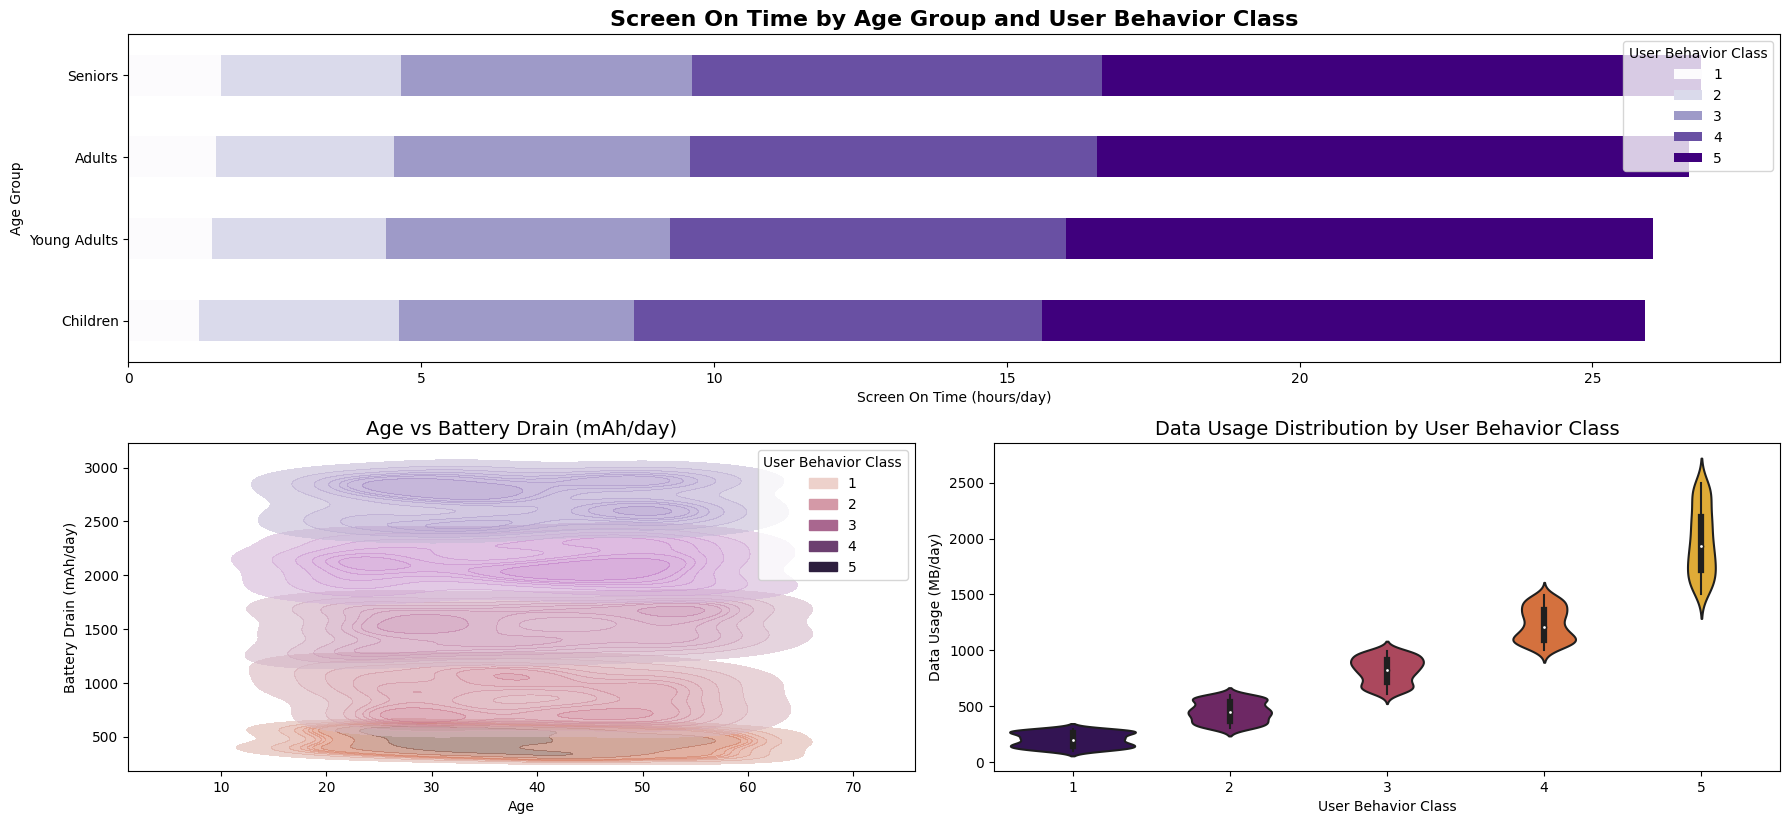

In [6]:
age_bins = pd.cut(df['Age'],bins=[0,18,30,50,80], labels=['Children','Young Adults','Adults','Seniors'])

df['Age Group'] = age_bins

fig = plt.figure(figsize=(18,12), facecolor='white')
ax1 = plt.subplot2grid((3,2),(0,0),colspan=2)
ax2 = plt.subplot2grid((3,2),(1,0))
ax3 = plt.subplot2grid((3,2),(1,1))


screen_time = df.groupby(['Age Group', 'User Behavior Class'])['Screen On Time (hours/day)'].mean().unstack()
screen_time.plot(kind='barh', stacked=True, colormap='Purples', ax=ax1)
ax1.set_title('Screen On Time by Age Group and User Behavior Class', fontsize=16, fontweight='bold')
ax1.set_xlabel('Screen On Time (hours/day)')
ax2.set_ylabel('Age Group')
ax1.grid(False)

sns.kdeplot(data=df, x='Age', y='Battery Drain (mAh/day)', hue='User Behavior Class', fill=True, alpha=0.6,ax=ax2)
ax2.set_title('Age vs Battery Drain (mAh/day)', fontsize=14)
ax2.set_xlabel('Age')
ax2.set_ylabel('Battery Drain (mAh/day)')

sns.violinplot(data=df, x='User Behavior Class', y= 'Data Usage (MB/day)', palette='inferno', ax=ax3)
ax3.set_title('Data Usage Distribution by User Behavior Class', fontsize=14)
ax3.set_xlabel('User Behavior Class')
ax3.set_ylabel('Data Usage (MB/day)')

plt.tight_layout()
plt.show()

## 2.2 Insights from this Analysis:

1. Battery Drain Distribution by User Behabior Class 🔋📊 : This chart visualizes battery drain distribution across different user behavior classes, highlighting patterns of energy consumption based on usage habits.

2. Average Screen On Time by Age Group 📱👶👵 : This analysis shows the average screen on time for different age groups, revealing how screen usage varies by age

3. Data Usage by Device Model 📱💻 : This chart presents data usage patterns across different device models, showing how device types influence internet consumption.

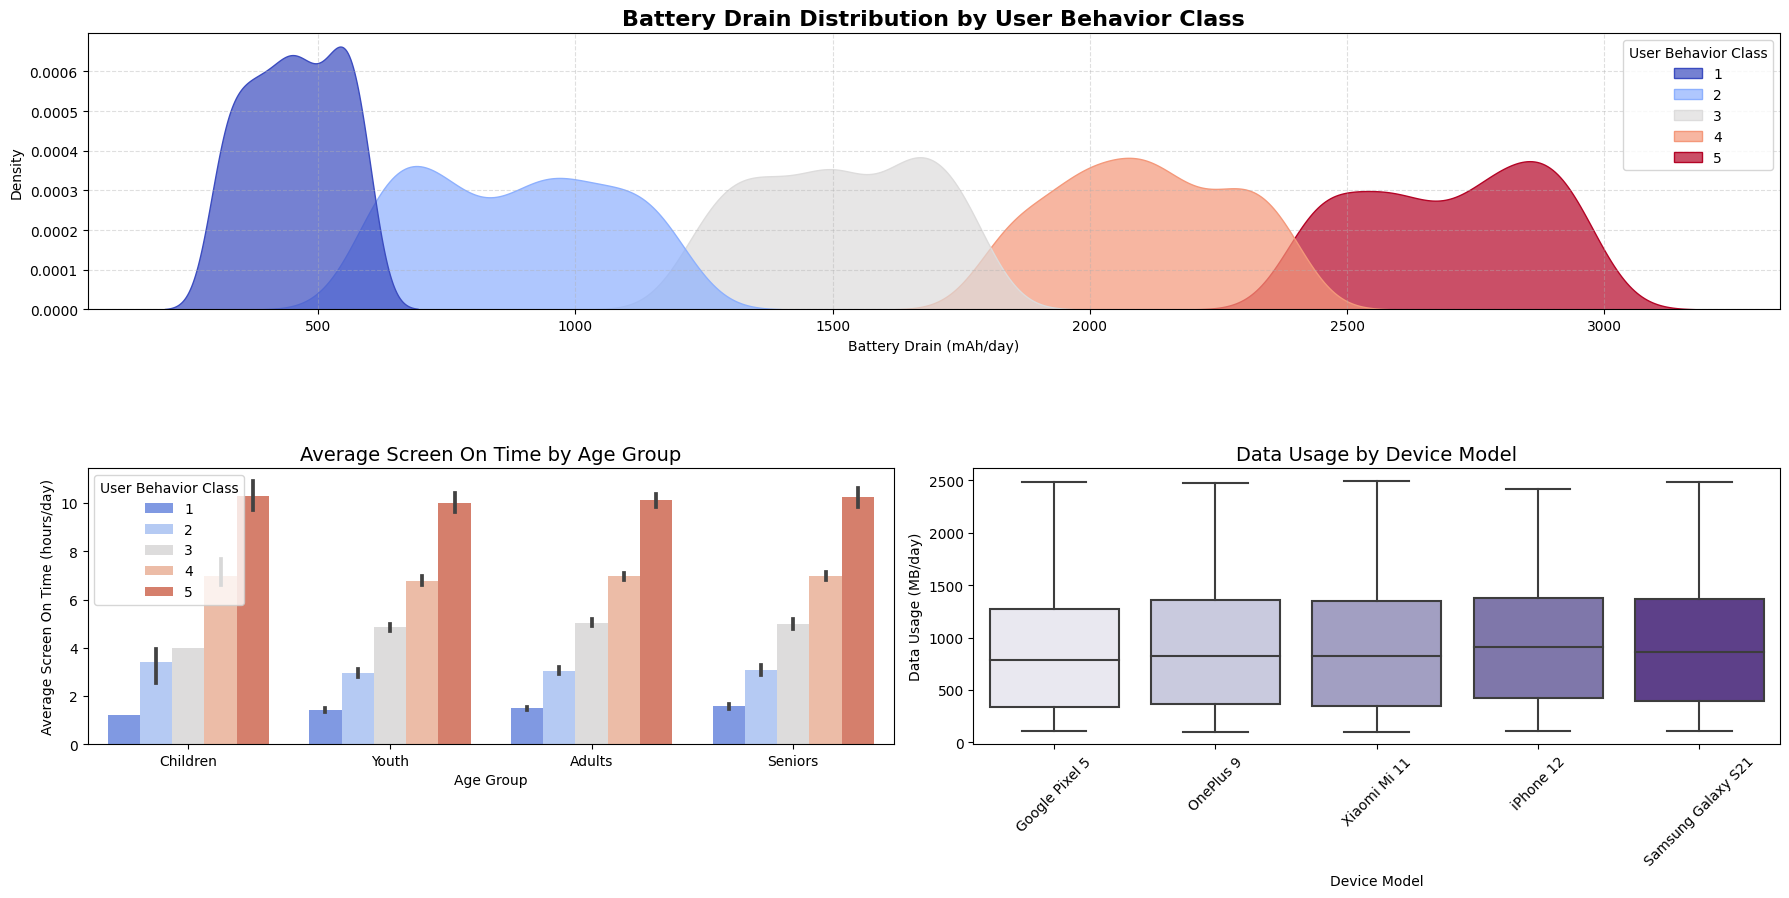

In [7]:
conditions = [
    (df['Device Model'].str.contains('Samsung', case=False)),
    (df['Device Model'].str.contains('iPhone', case=False)),
    (df['Device Model'].str.contains('Huawei', case=False)),
    (df['Device Model'].str.contains('Xiaomi', case=False))
]
choices = ['Samsung', 'iPhone', 'Huawei', 'Xiaomi']
df['Device Brand'] = np.select(conditions, choices, default='Other')

fig = plt.figure(figsize=(18, 12), facecolor='white')
ax1 = plt.subplot2grid((3, 2), (0, 0), colspan=2)
ax2 = plt.subplot2grid((3, 2), (1, 0))
ax3 = plt.subplot2grid((3, 2), (1, 1))

sns.kdeplot(data=df, x='Battery Drain (mAh/day)', hue='User Behavior Class', fill=True, alpha=0.7, palette='coolwarm', ax=ax1)
ax1.set_title('Battery Drain Distribution by User Behavior Class', fontsize=16, fontweight='bold')
ax1.set_xlabel('Battery Drain (mAh/day)')
ax1.set_ylabel('Density')
ax1.grid(True, linestyle='--', alpha=0.4)

age_bins = pd.cut(df['Age'], bins=[0, 18, 30, 50, 70], labels=['Children', 'Youth', 'Adults', 'Seniors'])
sns.barplot(x=age_bins, y='Screen On Time (hours/day)', hue='User Behavior Class', data=df, palette='coolwarm', ax=ax2)
ax2.set_title('Average Screen On Time by Age Group', fontsize=14)
ax2.set_xlabel('Age Group')
ax2.set_ylabel('Average Screen On Time (hours/day)')

sns.boxplot(data=df, x='Device Model', y='Data Usage (MB/day)', palette='Purples', ax=ax3)
ax3.set_title('Data Usage by Device Model', fontsize=14)
ax3.set_xlabel('Device Model')
ax3.set_ylabel('Data Usage (MB/day)')
ax3.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 2.3 Insights from this Analysis:

1. Relationship Between App Usage Time and User Behavior Class 📱📊 : This chart illustrates the relationship between app usage time and user behavior class, highlighting how different behavior types impact app usage.

2. Relationship Between Screen On Time and Battery Drain 📱🔋 : This analysis explores how screen on time influences battery drain, revealing the correlation between screen usage and energy consumption.

3. Gender Distribution bu User Behavior Class 👨‍💻👩‍💻 : This chart visualizes the gender distribution across different user behavior classes, shedding light on how gender affects behavior patterns.

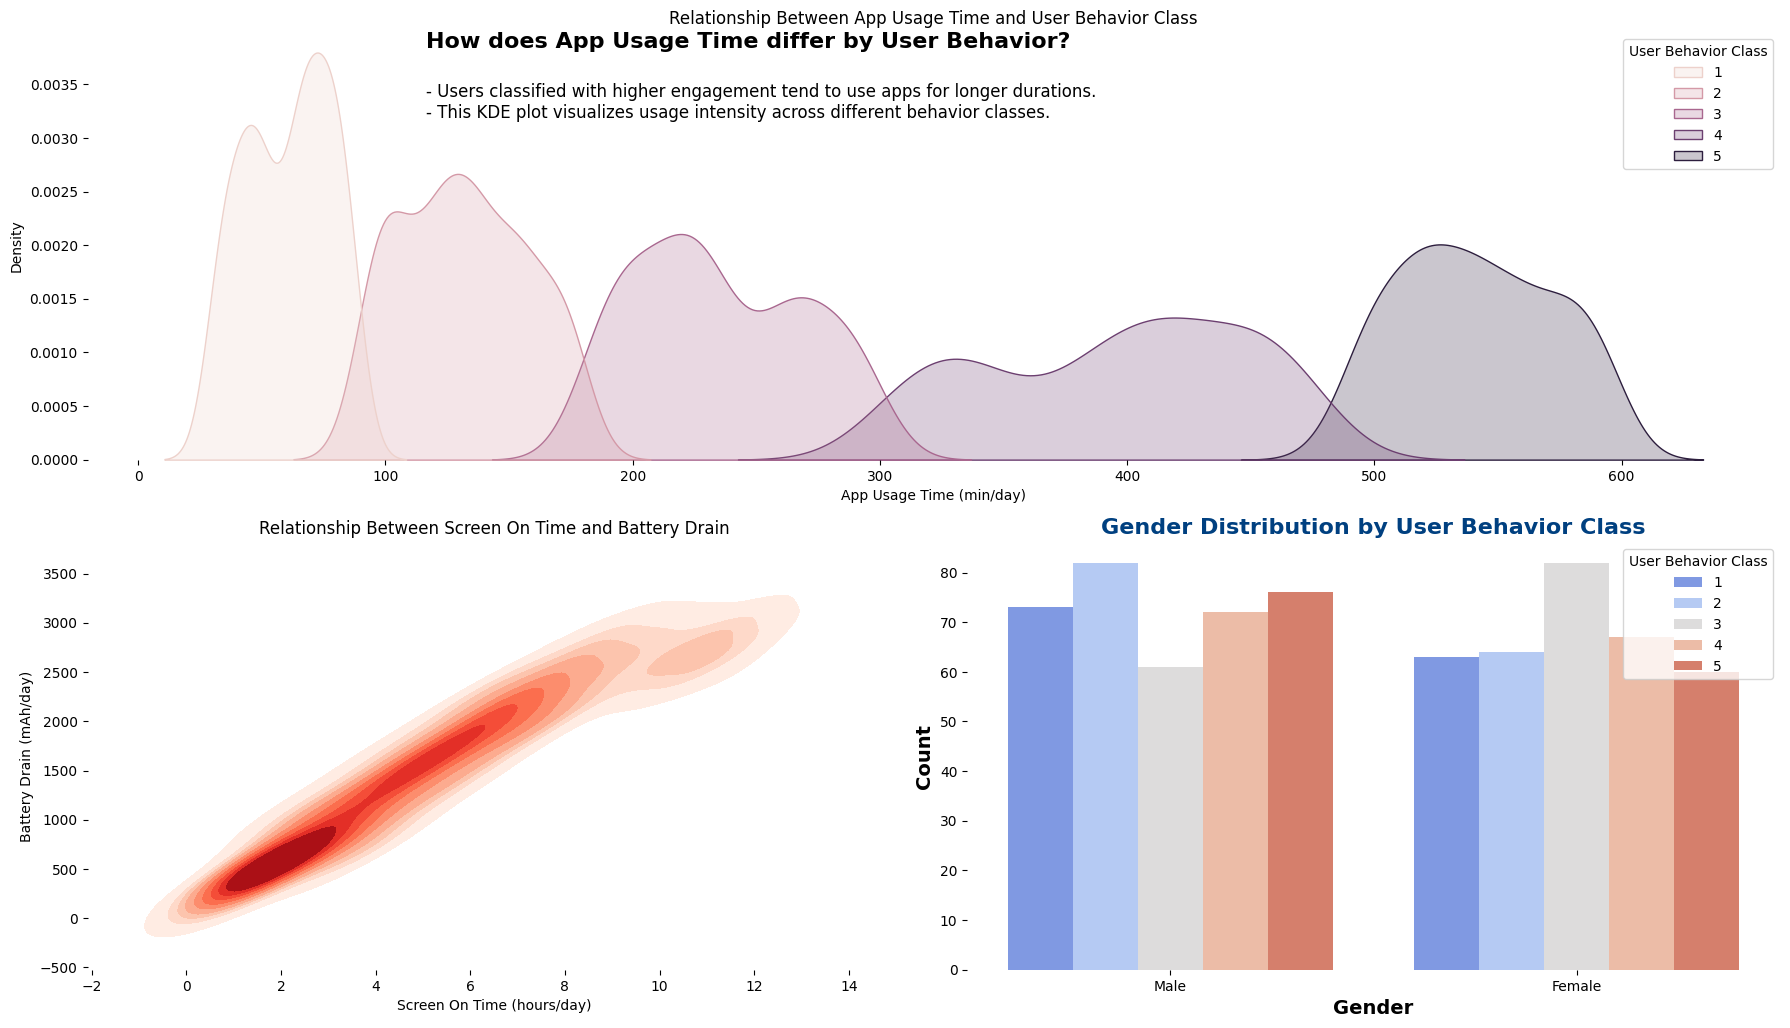

In [8]:
fig = plt.figure(figsize=(18, 15), facecolor='white')

ax1 = plt.subplot2grid((3, 2), (0, 0), colspan=2)
ax2 = plt.subplot2grid((3, 2), (1, 0))
ax3 = plt.subplot2grid((3, 2), (1, 1))

for ax in [ax1, ax2, ax3]:
    ax.set_facecolor('white')
    ax.grid(False)
    for spine in ax.spines.values():
        spine.set_visible(False)

sns.kdeplot(data=df, x='App Usage Time (min/day)', hue='User Behavior Class', fill=True, ax=ax1)
ax1.set_title('Relationship Between App Usage Time and User Behavior Class')
ax1.text(0.2, 1, 'How does App Usage Time differ by User Behavior?', 
         ha='left', va='top', fontweight='bold', fontsize=16, color='black', transform=ax1.transAxes)
ax1.text(0.2, 0.8, '- Users classified with higher engagement tend to use apps for longer durations.\n- This KDE plot visualizes usage intensity across different behavior classes.', 
         fontsize=12, color='black', transform=ax1.transAxes)

sns.kdeplot(data=df, x='Screen On Time (hours/day)', y='Battery Drain (mAh/day)', fill=True, cmap='Reds', ax=ax2)
ax2.set_title('Relationship Between Screen On Time and Battery Drain')

sns.countplot(x='Gender', hue='User Behavior Class', data=df, palette='coolwarm', ax=ax3)
ax3.set_title('Gender Distribution by User Behavior Class', fontsize=16, fontweight='bold', color='#004080')
ax3.set_xlabel('Gender', fontsize=14, fontweight='bold')
ax3.set_ylabel('Count', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

## 2.4 Insights from this Analysis:

1. High App Usage 📱🔥 : This chart highlights users with high app usage, indicating intensive interaction with apps that could reflect heavy engagement or dependency

2. Normal App Usage 📱🔄 : This chart shows users with normal app usage, representing typical engagement levels with apps.

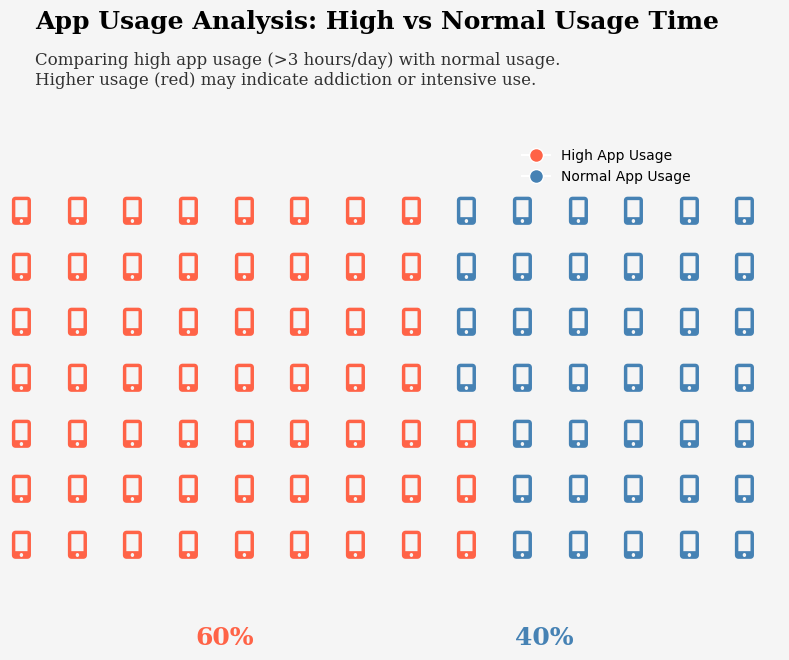

In [9]:
high_usage = df[df['App Usage Time (min/day)'] > 180]['App Usage Time (min/day)'].count()  
normal_usage = df[df['App Usage Time (min/day)'] <= 180]['App Usage Time (min/day)'].count()

total_usage = high_usage + normal_usage
high_percentage = int(round(high_usage / total_usage * 100, 0))
normal_percentage = int(round(normal_usage / total_usage * 100, 0))

fig = plt.figure(
    FigureClass=Waffle,
    rows=7,
    columns=14,
    values={"High App Usage": high_usage, "Normal App Usage": normal_usage},
    colors=['#ff6347', '#4682b4'], 
    icons='mobile-alt',  
    icon_size=20,
    icon_legend=True,
    figsize=(8, 8),
    facecolor='#f5f5f5',
    dpi=100
)

fig.text(0.05, 0.92, 'App Usage Analysis: High vs Normal Usage Time', 
         {'font': 'Serif', 'size': 18, 'color': 'black', 'weight': 'bold'})
fig.text(0.05, 0.85, 'Comparing high app usage (>3 hours/day) with normal usage.\nHigher usage (red) may indicate addiction or intensive use.', 
         {'font': 'Serif', 'size': 12, 'color': 'black'}, alpha=0.8)

# Yüzde değerleri
fig.text(0.25, 0.15, '{}%'.format(high_percentage), 
         {'font': 'Serif', 'size': 18, 'weight': 'bold', 'color': '#ff6347'})
fig.text(0.65, 0.15, '{}%'.format(normal_percentage), 
         {'font': 'Serif', 'size': 18, 'weight': 'bold', 'color': '#4682b4'})

plt.legend(
    handles=[
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#ff6347', markersize=10, label='High App Usage'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#4682b4', markersize=10, label='Normal App Usage')
    ],
    loc='upper right', bbox_to_anchor=(0.9, 1.1), frameon=False
)

fig.show()

## 2.5 Insights from this Analysis:
 
1. High Battery Drain 🔋⚡ : This chart highlights users with high battery drain, indicating excessive power consumption that may suggest heavy phone usage or power-hungry apps.

2. Normal Battery Drain 🔋🔄 : This chart shows users with normal battery drain, reflecting standard power usage that aligns with typical phone activity.

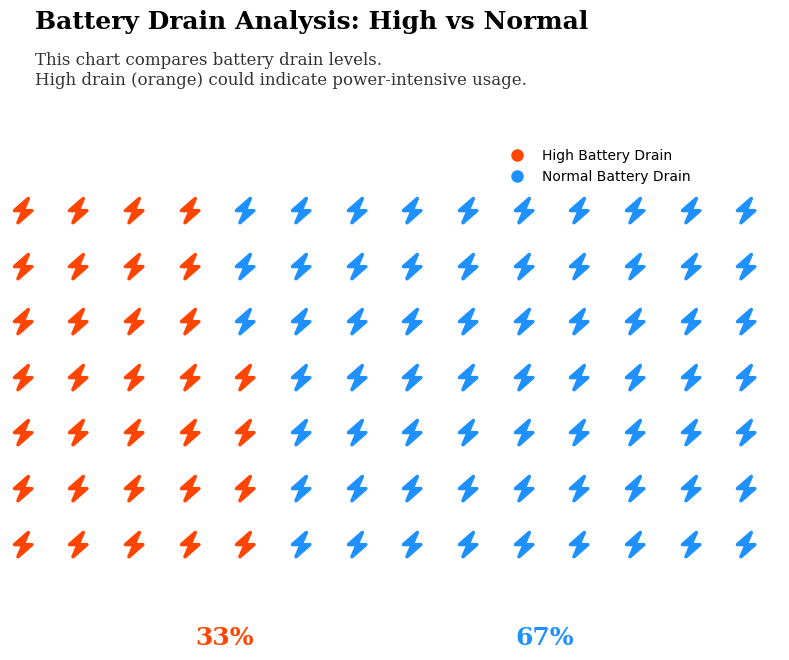

In [10]:
high_battery_drain = df[df['Battery Drain (mAh/day)'] > 2000]['Battery Drain (mAh/day)'].count()  
normal_battery_drain = df[df['Battery Drain (mAh/day)'] <= 2000]['Battery Drain (mAh/day)'].count()

total_battery = high_battery_drain + normal_battery_drain
high_percentage_battery = int(round(high_battery_drain / total_battery * 100, 0))
normal_percentage_battery = int(round(normal_battery_drain / total_battery * 100, 0))

fig = plt.figure(
    FigureClass=Waffle,
    rows=7,
    columns=14,
    values={"High Battery Drain": high_battery_drain, "Normal Battery Drain": normal_battery_drain},
    colors=['#ff4500', '#1e90ff'],  
    icons='bolt',  
    icon_size=20,
    icon_legend=True,
    figsize=(8, 8),
    facecolor='#ffffff',
    dpi=100
)

fig.text(0.05, 0.92, 'Battery Drain Analysis: High vs Normal', 
         {'font': 'Serif', 'size': 18, 'color': 'black', 'weight': 'bold'})
fig.text(0.05, 0.85, 'This chart compares battery drain levels.\nHigh drain (orange) could indicate power-intensive usage.', 
         {'font': 'Serif', 'size': 12, 'color': 'black'}, alpha=0.8)

fig.text(0.25, 0.15, '{}%'.format(high_percentage_battery), 
         {'font': 'Serif', 'size': 18, 'weight': 'bold', 'color': '#ff4500'})
fig.text(0.65, 0.15, '{}%'.format(normal_percentage_battery), 
         {'font': 'Serif', 'size': 18, 'weight': 'bold', 'color': '#1e90ff'})

plt.legend(
    handles=[
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#ff4500', markersize=10, label='High Battery Drain'),
        plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#1e90ff', markersize=10, label='Normal Battery Drain')
    ],
    loc='upper right', bbox_to_anchor=(0.9, 1.1), frameon=False
)

fig.show()

## 2.6 Insights from this Analysis:
1. High App Usage 📱⚡ : This chart shows users with high app usage, indicating frequent engagement with mobile applications, which may suggest a highly active mobile usage pattern.

2. Normal App Usage 📱🔄 : This chart represents users with normal app usage, reflecting balanced app interaction and moderate mobile activity.

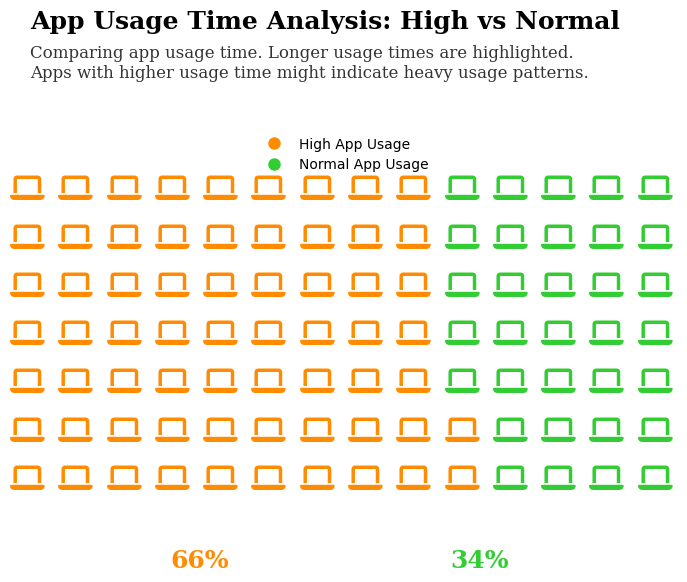

In [11]:
high_usage_time = df[df['App Usage Time (min/day)'] > 150]['App Usage Time (min/day)'].count()
normal_usage_time = df[df['App Usage Time (min/day)'] <= 150]['App Usage Time (min/day)'].count()

total_usage_time = high_usage_time + normal_usage_time
high_percentage_usage_time = int(round(high_usage_time / total_usage_time * 100, 0))
normal_percentage_usage_time = int(round(normal_usage_time / total_usage_time * 100, 0))

# Grafik oluşturuluyor
fig = plt.figure(
    FigureClass=Waffle,
    rows=7,
    columns=14,
    values={"High App Usage": high_usage_time, "Normal App Usage": normal_usage_time},
    colors=['#ff8c00', '#32cd32'],
    icons='laptop',
    icon_size=20,
    icon_legend=True,
    figsize=(7, 7),
    facecolor='#ffffff',
    dpi=100
)

fig.text(0.05, 0.92, 'App Usage Time Analysis: High vs Normal', 
         {'font': 'Serif', 'size': 18, 'color': 'black', 'weight': 'bold'})
fig.text(0.05, 0.85, 'Comparing app usage time. Longer usage times are highlighted.\nApps with higher usage time might indicate heavy usage patterns.',
         {'font': 'Serif', 'size': 12, 'color': 'black'}, alpha=0.8)
fig.text(0.25, 0.15, '{}%'.format(high_percentage_usage_time), 
         {'font': 'Serif', 'size': 18, 'weight': 'bold', 'color': '#ff8c00'})
fig.text(0.65, 0.15, '{}%'.format(normal_percentage_usage_time), 
         {'font': 'Serif', 'size': 18, 'weight': 'bold', 'color': '#32cd32'})

# Legend'i yukarı taşıma
plt.legend(
    handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#ff8c00', markersize=10, label='High App Usage'),
             plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#32cd32', markersize=10, label='Normal App Usage')],
    loc='upper center', bbox_to_anchor=(0.5, 1.1), frameon=False
)

plt.show()

## 2.7 Insights from this Analysis:

1. High Data Usage 🌐📊 : This chart displays users with high data usage, suggesting extensive internet consumption and possibly high media streaming or app usage.

2. Normal Data Usage 🌐💼 : This chart represents users with normal data usage, reflecting typical online activity without excessive data consumption.

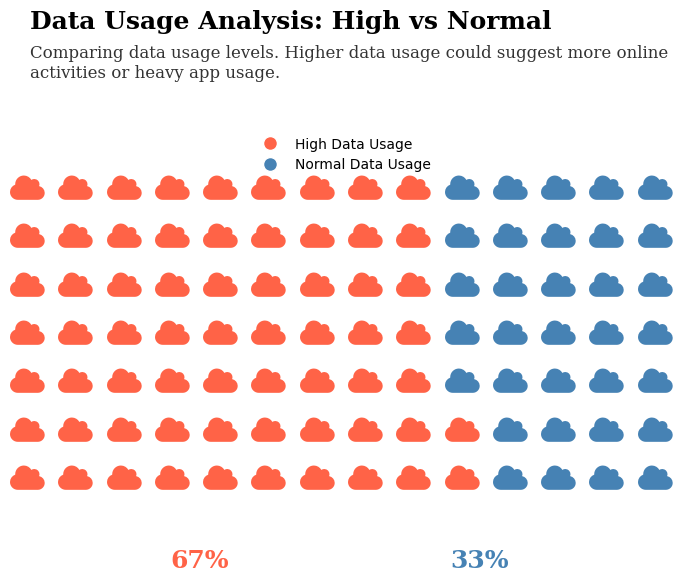

In [12]:
high_data_usage = df[df['Data Usage (MB/day)'] > 500]['Data Usage (MB/day)'].count()
normal_data_usage = df[df['Data Usage (MB/day)'] <= 500]['Data Usage (MB/day)'].count()

total_data_usage = high_data_usage + normal_data_usage
high_percentage_data_usage = int(round(high_data_usage / total_data_usage * 100, 0))
normal_percentage_data_usage = int(round(normal_data_usage / total_data_usage * 100, 0))

# Grafik oluşturuluyor
fig = plt.figure(
    FigureClass=Waffle,
    rows=7,
    columns=14,
    values={"High Data Usage": high_data_usage, "Normal Data Usage": normal_data_usage},
    colors=['#ff6347', '#4682b4'],
    icons='cloud',
    icon_size=20,
    icon_legend=True,
    figsize=(7, 7),
    facecolor='#ffffff',
    dpi=100
)

# Başlık ve açıklama ekleniyor
fig.text(0.05, 0.92, 'Data Usage Analysis: High vs Normal', 
         {'font': 'Serif', 'size': 18, 'color': 'black', 'weight': 'bold'})
fig.text(0.05, 0.85, 'Comparing data usage levels. Higher data usage could suggest more online\nactivities or heavy app usage.',
         {'font': 'Serif', 'size': 12, 'color': 'black'}, alpha=0.8)

# Yüzde oranları metin olarak ekleniyor
fig.text(0.25, 0.15, '{}%'.format(high_percentage_data_usage), 
         {'font': 'Serif', 'size': 18, 'weight': 'bold', 'color': '#ff6347'})
fig.text(0.65, 0.15, '{}%'.format(normal_percentage_data_usage), 
         {'font': 'Serif', 'size': 18, 'weight': 'bold', 'color': '#4682b4'})

# Legend kısmını üst kısma taşıma
plt.legend(
    handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#ff6347', markersize=10, label='High Data Usage'),
             plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#4682b4', markersize=10, label='Normal Data Usage')],
    loc='upper center', bbox_to_anchor=(0.5, 1.1), frameon=False
)

plt.show()

## 2.8 Insights from this Analysis:

1. Number of Apps Installed by Gender 📱♂️♀️ : This chart compares the number of apps installed by gender, showing potential differences in app usage patterns between male and female users.

2. Gender Distribution 👩‍💻👨‍💻 : This chart displays the gender distribution of users, providing insight into the balance between male and female users in the dataset.

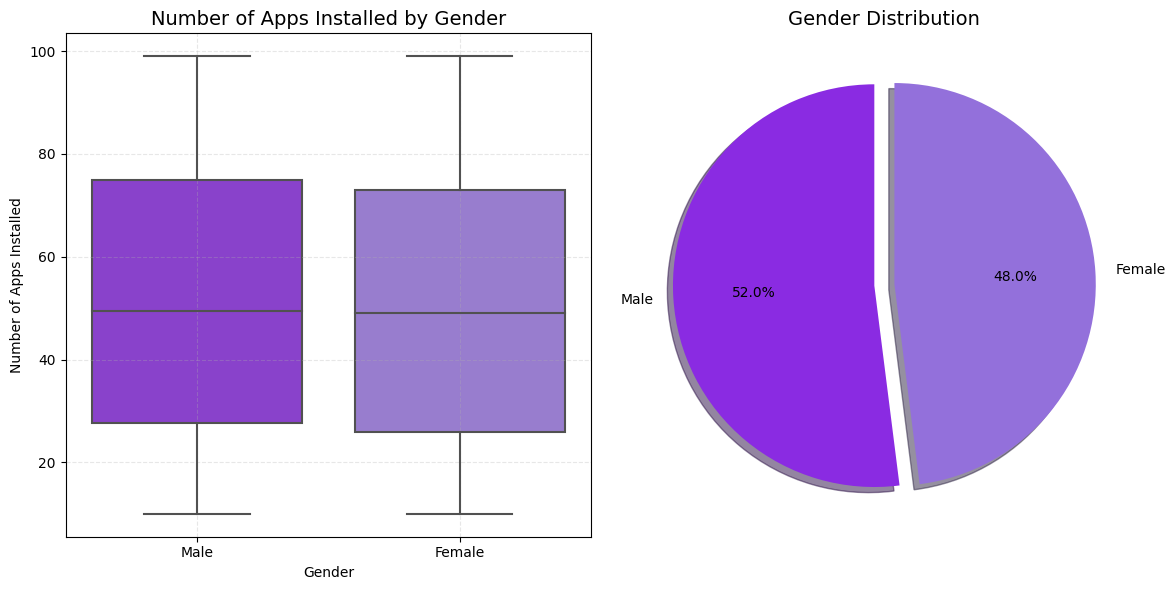

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.boxplot(data=df, x='Gender', y='Number of Apps Installed', palette=['#8A2BE2', '#9370DB'], ax=axes[0])
axes[0].set_title('Number of Apps Installed by Gender', fontsize=14)
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Number of Apps Installed')
axes[0].grid(True, linestyle='--', alpha=0.3)

gender_data = df['Gender'].value_counts()
explode = [0.05] * len(gender_data) 
colors = ['#8A2BE2', '#9370DB']
axes[1].pie(gender_data, labels=gender_data.index, autopct='%1.1f%%', shadow=True, explode=explode, colors=colors, startangle=90)
axes[1].set_title('Gender Distribution', fontsize=14)

plt.tight_layout()
plt.show()

# Credit: 

https://www.kaggle.com/code/ozanmhrc/mobile-device-usage-and-user-behavior/notebook